In [125]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("dark_background")
filterwarnings("ignore")

In [126]:
# 1, 2, 3

df = pd.read_csv(
    "https://raw.githubusercontent.com/narendramall/Predicting_Price_of_Pre_Owned_Cars/master/cars_sampled.csv"
)
df["dateCrawled"] = pd.to_datetime(df["dateCrawled"])
df["dateCreated"] = pd.to_datetime(df["dateCreated"])
df["lastSeen"] = pd.to_datetime(df["lastSeen"])
string_columns = [
    "name",
    "seller",
    "offerType",
    "abtest",
    "vehicleType",
    "gearbox",
    "model",
    "fuelType",
    "brand",
]
df[string_columns] = df[string_columns].astype("string")
df["notRepairedDamage"] = (
    df.notRepairedDamage.map({"no": False}).fillna(True).astype(bool)
)
print(df)
print(df.info())
print(df.nunique())

              dateCrawled                                               name  \
0     2016-03-30 13:51:00                                       Zu_verkaufen   
1     2016-07-03 09:54:00                             Volvo_XC90_2.4D_Summum   
2     2016-01-04 00:57:00                                  Volkswagen_Touran   
3     2016-03-19 17:50:00                       Seat_Ibiza_1.4_16V_Reference   
4     2016-03-16 14:51:00  Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...   
...                   ...                                                ...   
49996 2016-03-04 15:48:00                               Suche_VW_T5_Multivan   
49997 2016-03-27 14:55:00  Suche_einen_originalen_VW_Golf_2_Fire_and_Ice_G60   
49998 2016-03-14 18:51:00  [SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift__...   
49999 2016-03-15 18:06:00        Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten   
50000 2016-03-22 09:54:00                    Chevrolet_Matiz_1.Hd_TÜV11/2017   

           seller offerType  price   ab

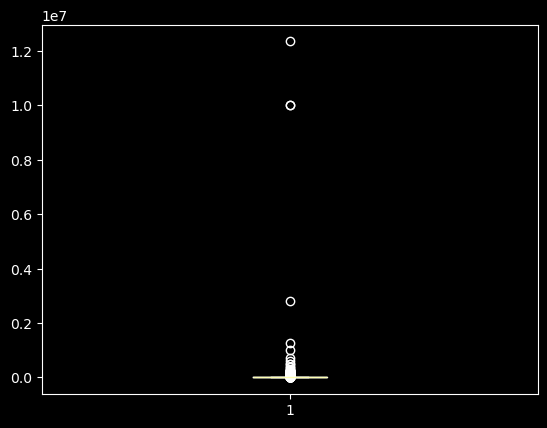

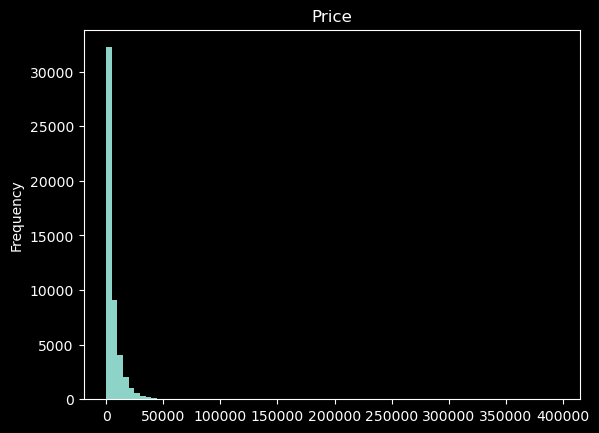

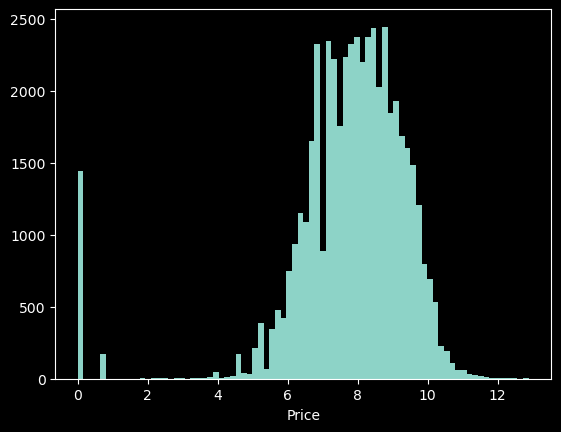

In [127]:
# 4

plt.figure()
plt.boxplot(df["price"])
plt.show()

df = df.drop(df.nlargest(10, "price").index)
df = df.drop(df.nsmallest(10, "price").index)

plt.hist(df["price"], bins=80)
plt.title("Price")
plt.ylabel("Frequency")
plt.show()

df["price"] = df["price"].apply(lambda x: np.log1p(x))

plt.hist(df["price"], bins=80)
plt.xlabel("Price")
plt.show()

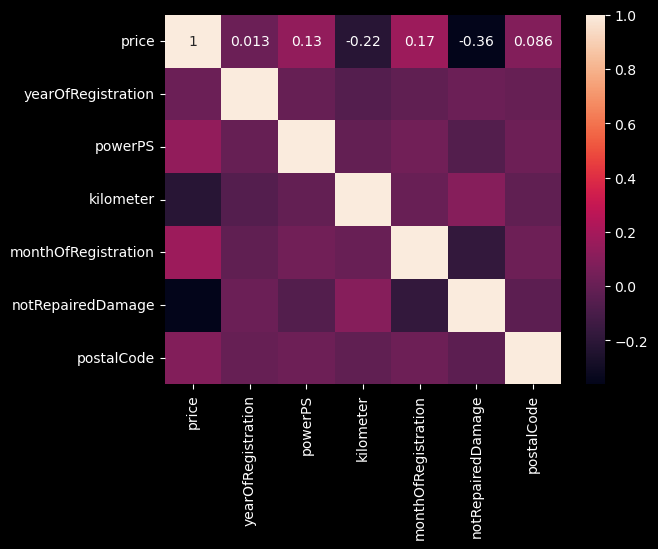

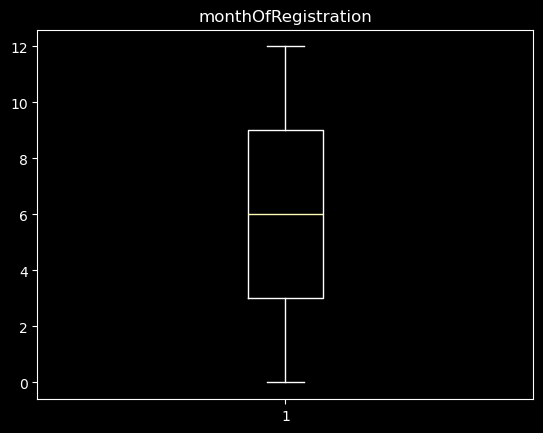

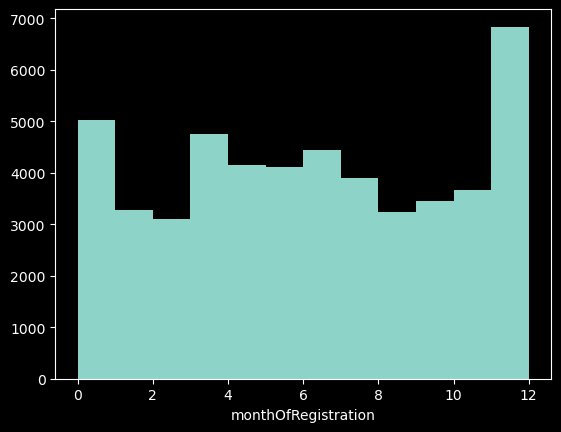

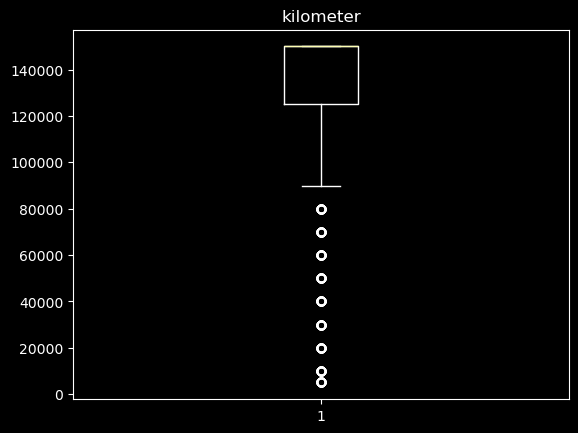

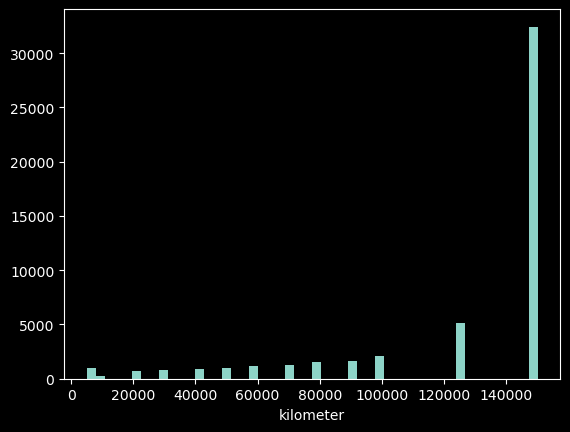

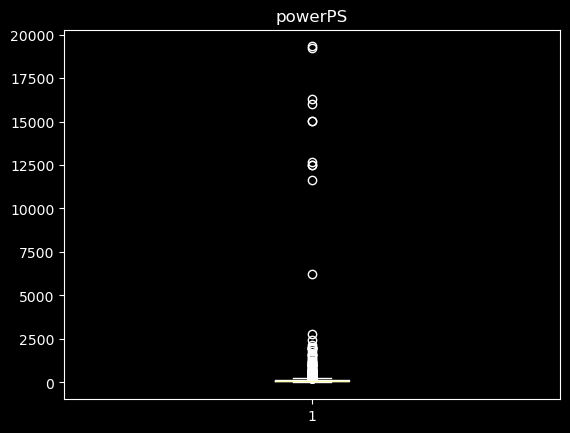

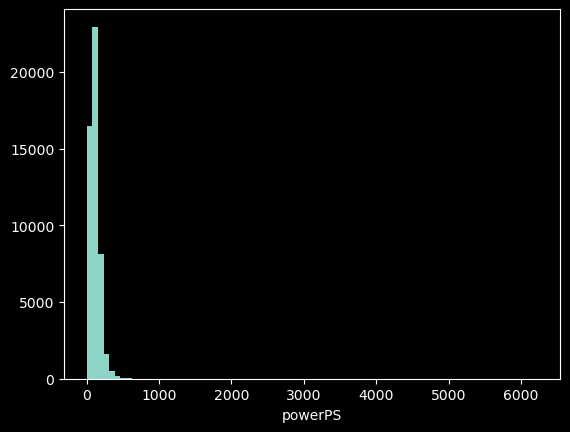

In [128]:
# 5

plt.figure()
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

plt.figure()
plt.title("monthOfRegistration")
plt.boxplot(df["monthOfRegistration"])
plt.show()

plt.hist(df["monthOfRegistration"], bins=12)
plt.xlabel("monthOfRegistration")
plt.show()

plt.figure()
plt.title("kilometer")
plt.boxplot(df["kilometer"])
plt.show()
df = df.drop(df.nsmallest(10, "kilometer").index)
plt.hist(df["kilometer"], bins=50)
plt.xlabel("kilometer")
plt.show()

plt.figure()
plt.title("powerPS")
plt.boxplot(df["powerPS"])
plt.show()
df = df.drop(df.nlargest(10, "powerPS").index)
plt.hist(df["powerPS"], bins=80)
plt.xlabel("powerPS")
plt.show()

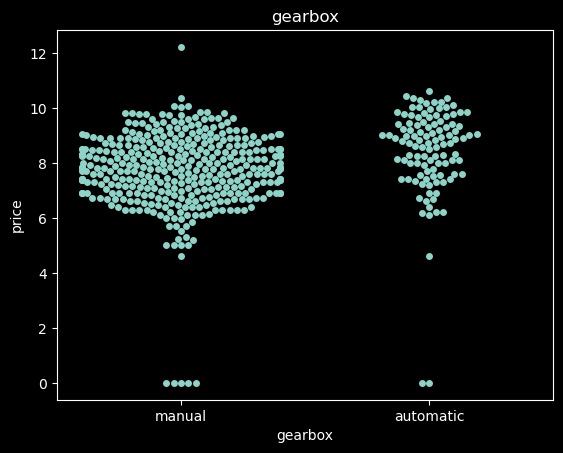

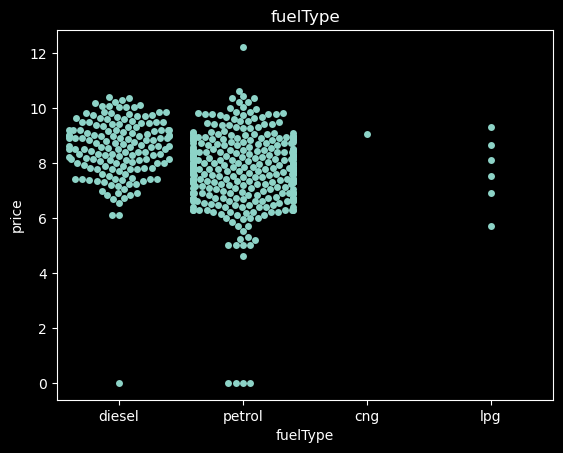

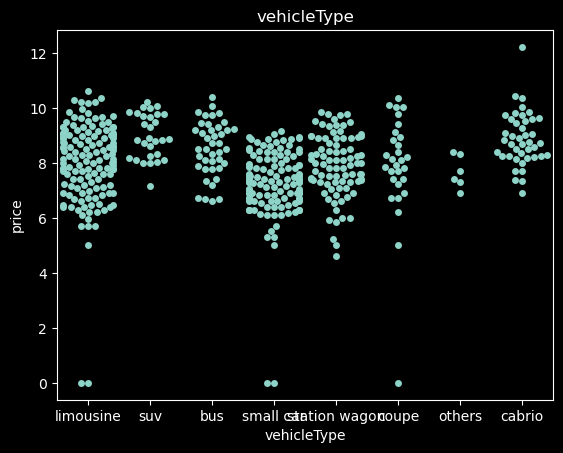

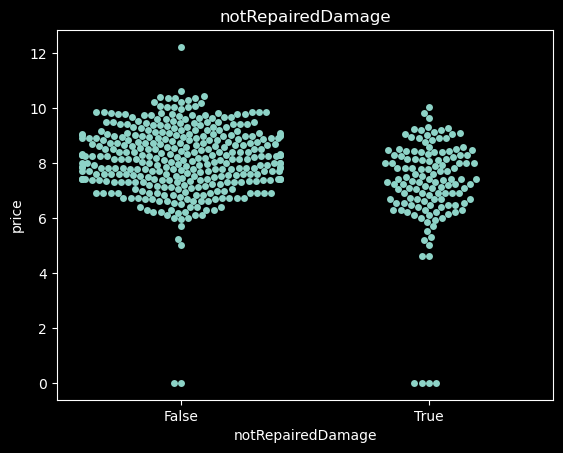

In [129]:
# 6

for col in ("gearbox", "fuelType", "vehicleType", "notRepairedDamage"):
    plt.figure()
    plt.title(col)
    sns.swarmplot(x=col, y="price", data=df.dropna(subset=[col]).head(500))
    plt.show()

In [130]:
# 7

print(df.info())
df.fillna(value=df.mode().iloc[0], inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49961 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dateCrawled          49961 non-null  datetime64[ns]
 1   name                 49961 non-null  string        
 2   seller               49961 non-null  string        
 3   offerType            49961 non-null  string        
 4   price                49961 non-null  float64       
 5   abtest               49961 non-null  string        
 6   vehicleType          44786 non-null  string        
 7   yearOfRegistration   49961 non-null  int64         
 8   gearbox              47147 non-null  string        
 9   powerPS              49961 non-null  int64         
 10  model                47211 non-null  string        
 11  kilometer            49961 non-null  int64         
 12  monthOfRegistration  49961 non-null  int64         
 13  fuelType             45470 non-

In [131]:
# 8

df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-30 13:51:00,Zu_verkaufen,private,offer,8.400884,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,True,2016-03-30,20257,2016-07-04 04:44:00
1,2016-07-03 09:54:00,Volvo_XC90_2.4D_Summum,private,offer,9.495519,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,False,2016-07-03,88045,2016-03-26 13:17:00
2,2016-01-04 00:57:00,Volkswagen_Touran,private,offer,8.071219,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,True,2016-03-31,27449,2016-01-04 08:40:00
3,2016-03-19 17:50:00,Seat_Ibiza_1.4_16V_Reference,private,offer,8.412055,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,False,2016-03-19,34537,2016-07-04 04:44:00
4,2016-03-16 14:51:00,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,9.839002,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,False,2016-03-16,55270,2016-01-04 23:18:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,2016-03-04 15:48:00,Suche_VW_T5_Multivan,private,request,0.000000,test,bus,2005,manual,0,transporter,150000,0,petrol,volkswagen,True,2016-03-04,29690,2016-05-04 15:16:00
49997,2016-03-27 14:55:00,Suche_einen_originalen_VW_Golf_2_Fire_and_Ice_G60,private,request,9.903488,control,limousine,1990,manual,0,golf,5000,0,petrol,volkswagen,True,2016-03-27,50181,2016-07-04 11:45:00
49998,2016-03-14 18:51:00,[SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift__...,private,request,0.000000,test,coupe,2004,manual,0,3er,150000,1,petrol,bmw,False,2016-03-14,86956,2016-03-25 06:17:00
49999,2016-03-15 18:06:00,Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten,commercial,offer,4.615121,control,station wagon,2000,manual,0,megane,150000,8,petrol,renault,True,2016-03-15,65232,2016-06-04 17:15:00
